In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

#class
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import PrecisionRecallDisplay

#score
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score, confusion_matrix,f1_score, roc_curve, auc, recall_score

from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

import tkinter
import matplotlib
#matplotlib.use('TkAgg')

In [2]:
def evaluateBinaryClassification(predictions, actuals):
    contigency = pd.crosstab(actuals,predictions)
    TP = contigency[1][1]
    TN = contigency[0][0]
    FP = contigency[1][0]
    FN = contigency[0][1]
    n = contigency.sum().sum()

    Acuracy = (TP + TN)/n
    Recall = TP/(TP+FN)
    Precision = TP/(TP+FP)
    FScore = 2*Recall*Precision/(Recall+Precision)
    
    return Acuracy, Recall, Precision, FScore

#Read data

In [3]:
#Read data
df_agg = pd.read_csv("Sample Data/FS_ALL.csv")
df_agg.head()

,"Total debt service (% of exports of goods, services and primary income)",Short-term debt (% of total external debt),Real interest rate (%),Total reserves minus gold (in %),Trade (% of GDP),Imports of goods and services (current US$),Exports of goods and services (current US$),Current account balance (% of GDP),"Portfolio investment, net (BoP, current US$)","Foreign direct investment, net inflows (% of GDP)",...,Left Government (democ),Polity (polity),Durable (durable),Turnover (xconst),Legislative/Executive election (exrec),State fragility index (sfi),Years (poleff),Economic Effectiveness (ecoeff),Presist (presistance),Target
0,0.0,0.0,0.511705,1.000000,0.380783,0.002563,0.003350,0.453849,0.206589,0.038336,...,1.0,1.0,0.775862,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
1,0.0,0.0,0.512088,0.848367,0.371018,0.003331,0.003961,0.461811,0.206589,0.038640,...,1.0,1.0,0.784483,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
2,0.0,0.0,0.511337,0.664417,0.338931,0.004087,0.005054,0.469933,0.206589,0.048814,...,1.0,1.0,0.793103,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
3,0.0,0.0,0.509767,0.472346,0.347603,0.006803,0.007776,0.476156,0.206589,0.073088,...,1.0,1.0,0.801724,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
4,0.0,0.0,0.508391,0.404584,0.356862,0.008622,0.009476,0.483780,0.206589,0.043774,...,1.0,1.0,0.810345,1.0,1.0,0.166667,0.0,0.0,1.0,0.0


#Explore the Data

#Classification with Scikit-Learn

In [4]:
from sklearn import svm

# 讀入資料
X = df_agg.drop(columns=['Target','Short-term debt (% of total external debt)','Total debt service (% of exports of goods, services and primary income)'])
X = X.values
y = df_agg['Target'].values

# 切分訓練與測試資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [5]:
#print(X,y)

In [6]:
# 建立分類器
clf = svm.SVC(kernel='rbf',C=30,gamma='auto')
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.8974358974358975

In [7]:
# 預測
y_pred = clf.predict(X_test)
#print(y_pred)

In [8]:
# 標準答案
#y_test

Confusion Matrix:
 [[67  1]
 [ 7  3]]
Accuracy: 0.8974358974358975
Recall Score (Macro) 0.6426470588235295
Recall Score (Default) 0.3
Precision Score (Macro) 0.8277027027027026
Precision Score (Default) 0.75
F1 Score (Macro): 0.6861167002012072
F1 Score (Default): 0.4285714285714285
ROC_AUC Score 0.6426470588235295


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


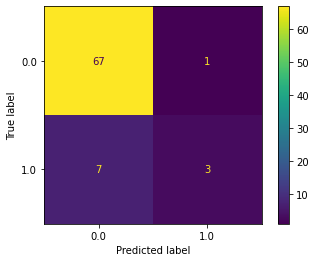

In [9]:
# 績效
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Recall Score (Macro)", recall_score(y_test, y_pred, average='macro',zero_division=1))
print("Recall Score (Default)", recall_score(y_test, y_pred, zero_division=1))     

print("Precision Score (Macro)",precision_score(y_test, y_pred, average='macro',zero_division=1))
print("Precision Score (Default)",precision_score(y_test, y_pred, zero_division=1))

print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))
print("F1 Score (Default):", f1_score(y_test, y_pred,zero_division=1))

print("ROC_AUC Score",roc_auc_score(y_test,y_pred,multi_class='ovr'))
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

Kfold Corss Validation

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm.SVC(kernel='linear' ,C=10,gamma='auto'), X, y, cv=5)

array([0.78846154, 0.55769231, 0.96153846, 0.32692308, 0.88461538])

In [11]:
cross_val_score(svm.SVC(kernel='rbf' ,C=10,gamma='auto'), X, y, cv=5)

array([0.90384615, 0.63461538, 0.92307692, 0.46153846, 0.88461538])

In [12]:
cross_val_score(svm.SVC(kernel='linear' ,C=20,gamma='auto'), X, y, cv=5)

array([0.63461538, 0.57692308, 0.96153846, 0.32692308, 0.88461538])

In [13]:
kernels = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval ,C=cval,gamma='auto'), X, y, cv=5)
        avg_scores[kval+'_'+str(cval)] = np.average(cv_scores)
avg_scores

{'rbf_1': 0.8884615384615383,
 'rbf_10': 0.7615384615384616,
 'rbf_20': 0.7307692307692307,
 'linear_1': 0.7500000000000001,
 'linear_10': 0.7038461538461539,
 'linear_20': 0.676923076923077}

GridSearch CV

In [14]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(X_test, y_test)
clf.cv_results_

{'mean_fit_time': array([0.00060062, 0.00020018, 0.00059986, 0.00040016, 0.        ,
        0.00020008]),
 'std_fit_time': array([0.00049041, 0.00040035, 0.00048978, 0.0004901 , 0.        ,
        0.00040016]),
 'mean_score_time': array([0.        , 0.00020003, 0.00020013, 0.00020003, 0.00080028,
        0.00080018]),
 'std_score_time': array([0.        , 0.00040007, 0.00040026, 0.00040007, 0.00040014,
        0.00040009]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],


Confusion Matrix:
 [[67  1]
 [ 7  3]]
Accuracy: 0.8974358974358975
Recall Score (Macro) 0.6426470588235295
Recall Score (Default) 0.3
Precision Score (Macro) 0.8277027027027026
Precision Score (Default) 0.75
F1 Score (Macro): 0.6861167002012072
F1 Score (Default): 0.4285714285714285
ROC_AUC Score 0.6426470588235295


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


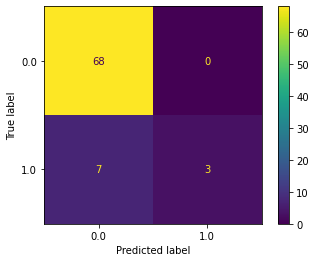

In [15]:
# AFTER CV 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Recall Score (Macro)", recall_score(y_test, y_pred, average='macro',zero_division=1))
print("Recall Score (Default)", recall_score(y_test, y_pred, zero_division=1))     

print("Precision Score (Macro)",precision_score(y_test, y_pred, average='macro',zero_division=1))
print("Precision Score (Default)",precision_score(y_test, y_pred, zero_division=1))

print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))
print("F1 Score (Default):", f1_score(y_test, y_pred,zero_division=1))
print("ROC_AUC Score",roc_auc_score(y_test,y_pred,multi_class='ovr'))
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

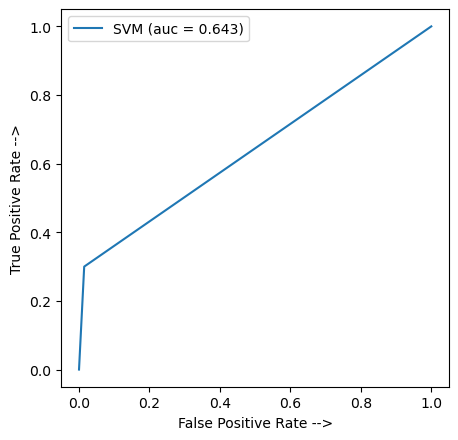

In [16]:
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()


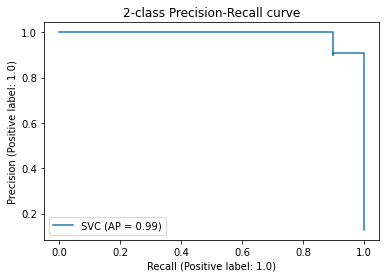

In [17]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="SVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [18]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000601,0.00049,0.0000,0.0000,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.8750,0.8750,0.875,0.866667,0.866667,0.871667,0.004082,6
1,0.000200,0.00040,0.0002,0.0004,1,linear,"{'C': 1, 'kernel': 'linear'}",0.8750,0.9375,0.875,0.933333,0.866667,0.897500,0.031136,2
2,0.000600,0.00049,0.0002,0.0004,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.8750,0.9375,0.875,0.866667,0.866667,0.884167,0.026926,5
3,0.000400,0.00049,0.0002,0.0004,10,linear,"{'C': 10, 'kernel': 'linear'}",0.8125,0.9375,0.875,1.000000,0.800000,0.885000,0.075581,3
4,0.000000,0.00000,0.0008,0.0004,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.8750,0.9375,0.875,1.000000,0.866667,0.910833,0.051343,1
5,0.000200,0.00040,0.0008,0.0004,20,linear,"{'C': 20, 'kernel': 'linear'}",0.8125,0.9375,0.875,1.000000,0.800000,0.885000,0.075581,3


In [19]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.871667
1,1,linear,0.897500
2,10,rbf,0.884167
3,10,linear,0.885000
4,20,rbf,0.910833
5,20,linear,0.885000


In [20]:
#dir(clf)

In [21]:
clf.best_score_

0.9108333333333334

In [22]:
clf.best_params_

{'C': 20, 'kernel': 'rbf'}

randomizedSearchCV

In [23]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(X, y)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,20,rbf,0.730769
1,10,rbf,0.761538


Differenct Hyperparameters

In [24]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [25]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.888462,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.765385,{'n_estimators': 1}
2,logistic_regression,0.865385,{'C': 1}
